In [1]:
# importing the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# reading the data
df = pd.read_csv("/home/amon/Downloads/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# dropping the column with missing values
df_na_val = df.drop(['Unnamed: 32'], axis = 1)

In [4]:
df_na_val.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df_na_val['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [6]:
df_na_val['diagnosis'].replace('B',0,inplace=True)
df_na_val['diagnosis'].replace('M',1,inplace=True)

In [7]:
df_na_val.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Removing the outliers ##

In [8]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_na_val))
print(z)

[[0.23640517 1.29767572 1.09706398 ... 2.29607613 2.75062224 1.93701461]
 [0.23640344 1.29767572 1.82982061 ... 1.0870843  0.24388967 0.28118999]
 [0.43174109 1.29767572 1.57988811 ... 1.95500035 1.152255   0.20139121]
 ...
 [0.23572747 1.29767572 0.70228425 ... 0.41406869 1.10454895 0.31840916]
 [0.23572517 1.29767572 1.83834103 ... 2.28998549 1.91908301 2.21963528]
 [0.24240586 0.77060855 1.80840125 ... 1.74506282 0.04813821 0.75120669]]


In [9]:
df_clean = df_na_val[(z < 3).all(axis=1)]

In [10]:
df_clean.shape

(487, 32)

In [11]:
# y includes our labels and x includes our features
y = df_clean['diagnosis']                   # M or B 
list = ['id','diagnosis']
x = df_clean.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


## Scaling the Data ##

In [12]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(x)
scaled

array([[0.83424397, 0.38362684, 0.82273105, ..., 0.68863384, 0.3717064 ,
        0.42980015],
       [0.78021978, 0.54926226, 0.79595605, ..., 0.89966679, 0.64240903,
        0.41158614],
       [0.81705445, 0.22037125, 0.84304312, ..., 0.60162903, 0.25062735,
        0.27498103],
       ...,
       [0.89502118, 0.60352213, 0.90674915, ..., 0.82043688, 0.15526976,
        0.20376929],
       [0.80723187, 0.88243693, 0.80703536, ..., 0.60273973, 0.31587202,
        0.14330888],
       [0.59052121, 0.87434555, 0.59560521, ..., 0.52499074, 0.20483061,
        0.29294207]])

In [13]:
import sys
sys.path.append("../scripts/")
from features import feature_scaling
scaled_features = feature_scaling(x,'diagnosis')
scaled_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,2.224859,-0.275471,2.086170,2.480931,-0.811123,-0.397576,0.205810,0.830214,0.151425,-0.936730,...,2.235281,-0.302860,1.956635,2.536527,-0.334504,-0.360396,0.000953,1.371178,-0.181647,0.513669
2,1.933363,0.600615,1.945675,2.048186,1.130272,1.580205,1.997254,2.611405,1.268360,-0.334883,...,1.889113,0.070575,1.732509,1.986246,0.641926,1.529480,1.220261,2.354829,1.554049,0.413568
4,2.132110,-1.138970,2.192752,2.378902,0.404006,0.920621,2.006981,1.883255,0.138387,-0.545167,...,1.638020,-1.490104,1.721836,1.687713,0.310129,-0.214227,0.925945,0.965637,-0.957984,-0.337183
5,-0.464861,-0.796591,-0.352138,-0.505711,2.551567,1.826029,1.355252,1.160967,1.346589,2.590964,...,-0.085505,-0.242970,-0.014255,-0.168983,2.286689,2.327057,1.717211,1.165819,2.302228,2.973075
6,1.456368,0.280894,1.441833,1.474712,-0.038782,0.341354,0.624083,0.948384,0.073196,-0.800770,...,1.720905,0.445772,1.757412,1.756777,0.632446,0.203628,0.799810,1.495428,0.447869,0.142464


In [14]:
cleaned_scaled = feature_scaling(df_na_val,'diagnosis')
cleaned_scaled.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [15]:
cleaned_data = cleaned_scaled.drop(['id'], axis = 1)
cleaned_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [31]:
# creating a data file for the clean data
cleaned_data.to_csv('/home/amon/Desktop/10Academy/industry-casualty/Data/clean_data.csv')

## checking the feature significance using the xgboost ##

In [16]:
from xgboost_modeller import XgModeller
mdlr = XgModeller()

2021-08-26 20:02:45,589 - XgModeller initialized...


In [17]:
base, best = mdlr.gridsearch_model(X=x, Y=y, output=True) 

2021-08-26 20:02:49,878 - Randomized+SearchCV in process, 'n_estimators'=15 ...
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[20:02:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95; total time=   0.4s
[20:02:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[20:02:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the 

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[20:02:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[20:02:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lamb

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[20:02:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[20:02:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[20:02:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[20:02:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[20:02:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:lo

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[20:02:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[20:02:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=20, reg_alpha=0.75, re

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=1.5, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[20:02:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6; total time=   0.0s
[20:02:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.01, reg_l

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6; total time=   0.1s
[20:02:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6; total time=   0.0s
[20:02:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=1e-05, reg_la

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[20:02:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95; total time=   0.1s
[20:02:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95; total time=   0.1s
[20:02:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[CV] END colsample_bytree=0.4, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95; total time=   0.1s
[20:02:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[20:02:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lamb

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[20:02:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[20:02:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lambda=

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6; total time=   0.1s
[20:02:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6; total time=   0.1s
[20:02:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lam

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6; total time=   0.1s
[20:02:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.6; total time=   0.1s
[20:02:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lamb

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[20:02:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[20:02:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lamb

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[20:02:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[20:02:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[20:02:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[20:02:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[20:02:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logis

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[20:02:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95; total time=   0.1s
[20:02:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95; total time=   0.1s
[20:02:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary

/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/amon/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWa

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95; total time=   0.1s
[20:02:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95; total time=   0.1s
[20:02:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=1e-05, re

2021-08-26 20:02:54,281 - Best_estimator in retrieved


In [18]:
best_params = best.get_xgb_params()

2021-08-26 20:03:03,789 - Feature importance plotting in process...


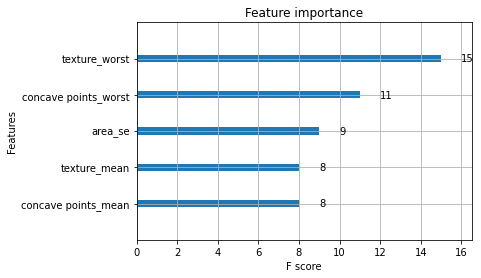

In [19]:
mdlr.best_feature_imp(max_feats=5)

In [20]:
important_features = x[['texture_mean', 'radius_worst', 'texture_worst', 'concavity_worst', 'area_se']].copy()

In [21]:
important_features['diagnosis']=y

In [22]:
important_features.head()

,texture_mean,radius_worst,texture_worst,concavity_worst,area_se,diagnosis
1,17.77,24.99,23.41,0.2416,74.08,1
2,21.25,23.57,25.53,0.4504,94.03,1
4,14.34,22.54,16.67,0.4000,94.44,1
5,15.70,15.47,23.75,0.5355,27.19,1
6,19.98,22.88,27.66,0.3784,53.91,1


In [23]:
important_features.to_csv('/home/amon/Desktop/10Academy/industry-casualty/Data/final_data.csv')